Esta notebook parte tomando el dataframe generado en la notebook anterior. Luego de un breve análisis, procedemos a armar el conjunto que se utilizará para entrenar los modelos de aprendizaje suervisado.

In [ ]:
#pip install xgboost jupyter

In [ ]:
 #pip install imblearn

# IMPORTS

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from datetime import datetime

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from xgboost import XGBRegressor, XGBRFRegressor, XGBClassifier, XGBRFClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

#from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from matplotlib import pyplot as plt


# Read Data

In [2]:
df = pd.read_csv("../Mentoria_diplomatura/base_mayo22_habil_v3.csv")

In [3]:
df.head()

,TARJETA,CONTRATO,BOLETOS,CANT_LINEAS,LINEA_FRECUENTE,CANTIDAD_DIAS,PRIMER_DIA,ULTIMO_DIA,HORA_PRIMER_VIAJE,HORA_ULTIMO_VIAJE,HORA_PROMEDIO
0,1000001,Usuario comun,20,7,['L25'],7,2/5/2022,30/05/2022,16,21,19
1,1000002,Usuario comun,4,2,['L35 T'],3,2/5/2022,5/5/2022,22,20,20
2,1000003,Usuario comun,22,4,['C'],10,2/5/2022,30/05/2022,15,9,11
3,1000004,Usuario comun,52,3,['C'],19,2/5/2022,31/05/2022,6,22,14
4,1000005,Usuario comun,20,4,['L74'],18,2/5/2022,31/05/2022,6,5,6


In [4]:
df.dtypes

TARJETA               int64
CONTRATO             object
BOLETOS               int64
CANT_LINEAS           int64
LINEA_FRECUENTE      object
CANTIDAD_DIAS         int64
PRIMER_DIA           object
ULTIMO_DIA           object
HORA_PRIMER_VIAJE     int64
HORA_ULTIMO_VIAJE     int64
HORA_PROMEDIO         int64
dtype: object

In [5]:
df.CONTRATO.value_counts()

Usuario comun      532028
BEG                 83263
Adultos Mayores     31473
Discapacidad        15570
Resto               11259
BSC                 10358
BOS                  4941
Name: CONTRATO, dtype: int64

In [5]:
categorical_cols = ['LINEA_FRECUENTE','PRIMER_DIA', 'ULTIMO_DIA']

In [6]:
df[categorical_cols].nunique()

LINEA_FRECUENTE    71
PRIMER_DIA         28
ULTIMO_DIA         28
dtype: int64

In [7]:
X = df.drop(['CONTRATO'],axis=1)

In [8]:
y = df.CONTRATO

In [9]:
for col in categorical_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = RobustScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X

,TARJETA,BOLETOS,CANT_LINEAS,LINEA_FRECUENTE,CANTIDAD_DIAS,PRIMER_DIA,ULTIMO_DIA,HORA_PRIMER_VIAJE,HORA_ULTIMO_VIAJE,HORA_PROMEDIO
0,-0.996663,0.928571,1.333333,-0.303030,0.375,0.0,0.000000,0.428571,1.333333,1.50
1,-0.996660,-0.214286,-0.333333,0.000000,-0.125,0.0,0.333333,1.285714,1.166667,1.75
2,-0.996657,1.071429,0.333333,-0.818182,0.750,0.0,0.000000,0.285714,-0.666667,-0.50
3,-0.996655,3.214286,0.000000,-0.818182,1.875,0.0,0.111111,-1.000000,1.500000,0.25
4,-0.996652,0.928571,0.333333,0.787879,1.750,0.0,0.111111,-1.000000,-1.333333,-1.75
...,...,...,...,...,...,...,...,...,...,...
688887,0.980738,-0.357143,-0.333333,-0.424242,-0.375,1.0,0.111111,-0.571429,0.333333,-0.25
688888,0.980741,-0.428571,-0.666667,-0.090909,-0.375,1.0,0.111111,0.714286,0.833333,1.25
688889,0.980744,-0.428571,-0.666667,0.303030,-0.375,1.0,0.111111,0.714286,0.833333,1.25
688890,0.980747,-0.428571,-0.666667,-0.818182,-0.375,1.0,0.111111,0.142857,0.166667,0.25


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify = y)

# Analysis

Vamos a utilizar los algoritmos Decision Tree Classifier y Random Forest para intentar predecir los tipos de contratos

## Decision Tree Classifier

In [22]:
model_tree = DecisionTreeClassifier(random_state=0)
model_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [45]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],   #criterio de partición
    'max_depth': [2,4,6],   #profundidad máxima del arbol
    'min_samples_leaf': [1,2,3],    #cantidad mínima de samples por hoja
    'ccp_alpha': [0.001, 0.01, 1, 10],
    'splitter':["best"],
}

print(f'Combinaciones posibles: {len(ParameterGrid(param_grid_tree))}')

Combinaciones posibles: 72


In [46]:
model_tree = DecisionTreeClassifier(random_state=0)
grid_cv = GridSearchCV(model_tree, param_grid_tree, scoring='accuracy', cv=5)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.001, 0.01, 1, 10],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 3],
                         'splitter': ['best']},
             scoring='accuracy')

In [47]:
# Elegimos el mejor modelo
best_model_tree = grid_cv.best_estimator_
best_model_tree

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=6,
                       random_state=0)

In [48]:
train_predictions_tree = best_model_tree.predict(x_train)
accuracy_train_tree = accuracy_score(y_train, train_predictions_tree)
print(f"Accuracy train: %.2f%%" % (accuracy_train_tree * 100.0))

Accuracy train: 87.90%


In [49]:
test_predictions_tree = best_model_tree.predict(x_test)
accuracy_test_tree = accuracy_score(y_test, test_predictions_tree)
print("Accuracy test: %.2f%%" % (accuracy_test_tree * 100.0))

Accuracy test: 87.88%


### Evaluación sobre el conjunto de entrenamiento

In [50]:
print(classification_report(y_train, train_predictions_tree))

                 precision    recall  f1-score   support

Adultos Mayores       0.79      0.11      0.19     25178
            BEG       0.94      0.69      0.80     66610
            BOS       0.73      0.51      0.60      3953
            BSC       1.00      0.25      0.40      8287
   Discapacidad       0.53      0.29      0.37     12456
          Resto       0.85      0.39      0.53      9007
  Usuario comun       0.88      1.00      0.93    425622

       accuracy                           0.88    551113
      macro avg       0.81      0.46      0.55    551113
   weighted avg       0.87      0.88      0.85    551113



### Matriz de confusión sobre el conjunto de entrenamiento

In [51]:
cm=confusion_matrix(y_train, train_predictions_tree)
cm

array([[  2677,   1186,      0,      0,   1676,    229,  19410],
       [   300,  46064,      3,      6,      0,      0,  20237],
       [    16,    591,   2019,      0,      0,      0,   1327],
       [    56,    947,      0,   2086,      0,      0,   5198],
       [   285,     10,      0,      0,   3559,    404,   8198],
       [     1,     57,      0,      0,   1523,   3477,   3949],
       [    62,    280,    743,      0,      1,      0, 424536]])

/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


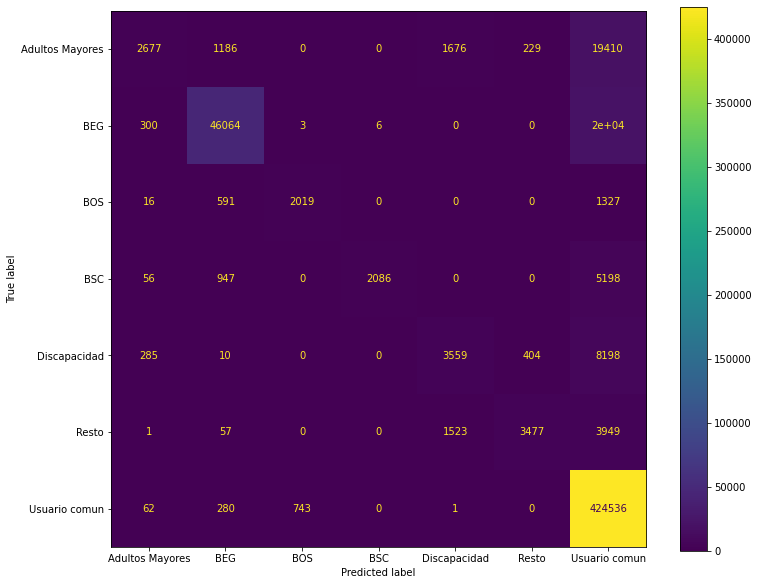

In [52]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_confusion_matrix(best_model_tree, x_train, y_train, ax=ax) 

### Evaluación sobre el conjunto de prueba

In [53]:
print(classification_report(y_test, test_predictions_tree))

                 precision    recall  f1-score   support

Adultos Mayores       0.76      0.10      0.18      6295
            BEG       0.94      0.69      0.80     16653
            BOS       0.74      0.50      0.60       988
            BSC       1.00      0.26      0.41      2071
   Discapacidad       0.52      0.28      0.36      3114
          Resto       0.84      0.38      0.52      2252
  Usuario comun       0.88      1.00      0.93    106406

       accuracy                           0.88    137779
      macro avg       0.81      0.46      0.54    137779
   weighted avg       0.87      0.88      0.85    137779



### Matriz de confusión sobre el conjunto de prueba

In [54]:
cm=confusion_matrix(y_test, test_predictions_tree)
cm

array([[   634,    305,      0,      0,    431,     59,   4866],
       [    84,  11570,      0,      1,      0,      0,   4998],
       [     8,    167,    497,      0,      0,      0,    316],
       [    13,    237,      0,    532,      0,      0,   1289],
       [    77,      2,      0,      0,    862,    106,   2067],
       [     0,     13,      0,      0,    351,    856,   1032],
       [    13,     78,    178,      0,      1,      3, 106133]])

/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


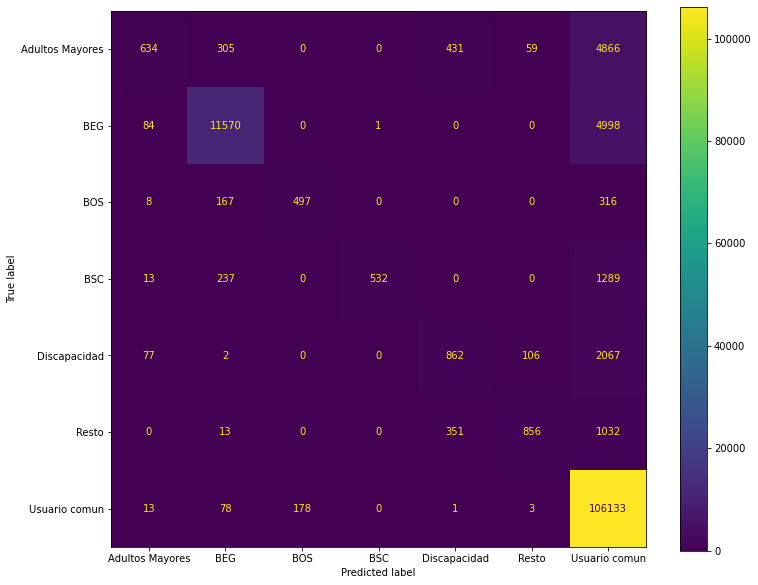

In [55]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_confusion_matrix(best_model_tree, x_test, y_test, ax=ax) 

## Random Forest Classifier

In [11]:
model_rf = RandomForestClassifier(random_state=0)
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [11]:
param_grid_rf = {
    'criterion': ['gini', 'entropy'],   
    'max_depth': [2,4,6],   
    'min_samples_leaf': [1,2,3],
    'ccp_alpha': [0.001],
}

print(f'Combinaciones posibles: {len(ParameterGrid(param_grid_rf))}')

Combinaciones posibles: 18


In [12]:
model_rf =ensemble.RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(model_rf, param_grid_rf, scoring='accuracy', cv=5)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.001], 'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='accuracy')

In [13]:
# Elegimos el mejor modelo
best_model_rf = grid_cv.best_estimator_
best_model_rf

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=6,
                       min_samples_leaf=3, random_state=0)

In [14]:
train_predictions_rf = best_model_rf.predict(x_train)
accuracy_train_rf = accuracy_score(y_train, train_predictions_rf)
print(f"Accuracy train: %.2f%%" % (accuracy_train_rf * 100.0))

Accuracy train: 84.06%


In [15]:
test_predictions_rf = best_model_rf.predict(x_test)
accuracy_test_rf = accuracy_score(y_test, test_predictions_rf)
print("Accuracy test: %.2f%%" % (accuracy_test_rf * 100.0))

Accuracy test: 84.12%


### Evaluación sobre el conjunto de entrenamiento

In [16]:
print(classification_report(y_train, train_predictions_rf))

/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

Adultos Mayores       0.00      0.00      0.00     25178
            BEG       0.86      0.58      0.69     66610
            BOS       0.00      0.00      0.00      3953
            BSC       0.00      0.00      0.00      8287
   Discapacidad       0.00      0.00      0.00     12456
          Resto       0.00      0.00      0.00      9007
  Usuario comun       0.84      1.00      0.91    425622

       accuracy                           0.84    551113
      macro avg       0.24      0.22      0.23    551113
   weighted avg       0.75      0.84      0.79    551113



/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de confusión sobre el conjunto de entrenamiento

In [17]:
cm=confusion_matrix(y_train, train_predictions_rf)
cm

array([[     0,   1497,      0,      0,      0,      0,  23681],
       [     0,  38334,      0,      0,      0,      0,  28276],
       [     0,   2278,      0,      0,      0,      0,   1675],
       [     0,   1792,      0,      0,      0,      0,   6495],
       [     0,      1,      0,      0,      0,      0,  12455],
       [     0,      4,      0,      0,      0,      0,   9003],
       [     0,    697,      0,      0,      0,      0, 424925]])

/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


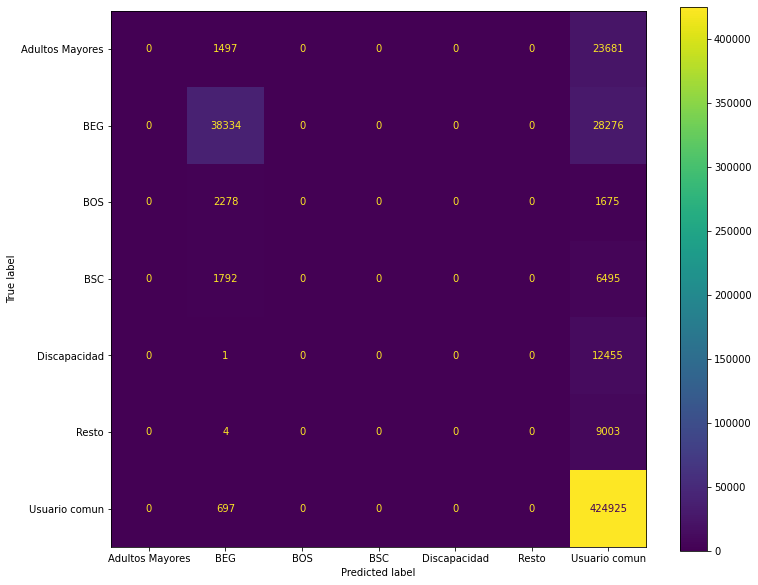

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_confusion_matrix(best_model_rf, x_train, y_train, ax=ax) 

### Evaluación sobre el conjunto de prueba

In [19]:
print(classification_report(y_test, test_predictions_rf))

/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

Adultos Mayores       0.00      0.00      0.00      6295
            BEG       0.86      0.58      0.69     16653
            BOS       0.00      0.00      0.00       988
            BSC       0.00      0.00      0.00      2071
   Discapacidad       0.00      0.00      0.00      3114
          Resto       0.00      0.00      0.00      2252
  Usuario comun       0.84      1.00      0.91    106406

       accuracy                           0.84    137779
      macro avg       0.24      0.23      0.23    137779
   weighted avg       0.75      0.84      0.79    137779



/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de confusión sobre el conjunto de prueba

In [20]:
cm=confusion_matrix(y_test, test_predictions_rf)
cm

array([[     0,    383,      0,      0,      0,      0,   5912],
       [     0,   9668,      0,      0,      0,      0,   6985],
       [     0,    545,      0,      0,      0,      0,    443],
       [     0,    425,      0,      0,      0,      0,   1646],
       [     0,      0,      0,      0,      0,      0,   3114],
       [     0,      2,      0,      0,      0,      0,   2250],
       [     0,    181,      0,      0,      0,      0, 106225]])

/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


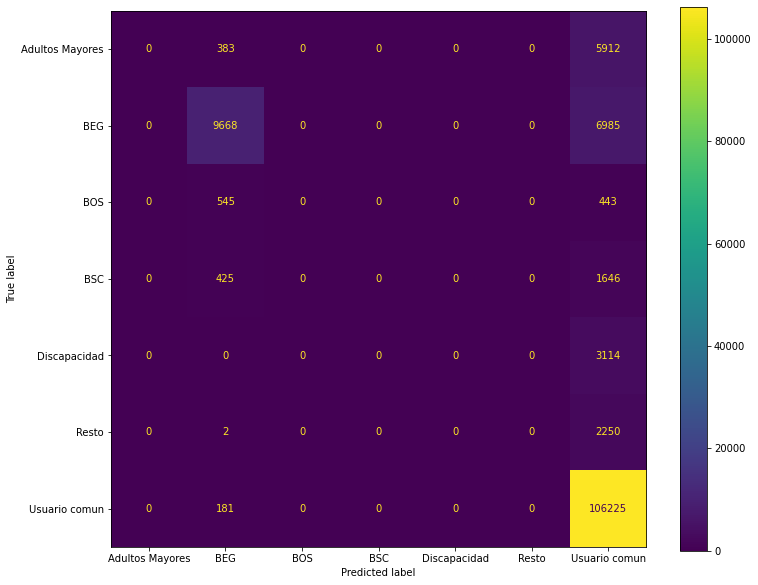

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_confusion_matrix(best_model_rf, x_test, y_test, ax=ax) 

 - https://www.projectpro.io/article/multi-class-classification-python-example/547
 - https://gursev-pirge.medium.com/performance-comparison-of-multi-class-classification-algorithms-606e8ba4e0ee

# Eliminando Usuarios Comunes

In [7]:
df.head()

,TARJETA,CONTRATO,BOLETOS,CANT_LINEAS,LINEA_FRECUENTE,CANTIDAD_DIAS,PRIMER_DIA,ULTIMO_DIA,HORA_PRIMER_VIAJE,HORA_ULTIMO_VIAJE,HORA_PROMEDIO
0,1000001,Usuario comun,20,7,['L25'],7,2/5/2022,30/05/2022,16,21,19
1,1000002,Usuario comun,4,2,['L35 T'],3,2/5/2022,5/5/2022,22,20,20
2,1000003,Usuario comun,22,4,['C'],10,2/5/2022,30/05/2022,15,9,11
3,1000004,Usuario comun,52,3,['C'],19,2/5/2022,31/05/2022,6,22,14
4,1000005,Usuario comun,20,4,['L74'],18,2/5/2022,31/05/2022,6,5,6


In [8]:
df.CONTRATO.value_counts()

Usuario comun      532028
BEG                 83263
Adultos Mayores     31473
Discapacidad        15570
Resto               11259
BSC                 10358
BOS                  4941
Name: CONTRATO, dtype: int64

In [9]:
df_2 = df[df['CONTRATO']!='Usuario comun']

In [10]:
df_2.shape

(156864, 11)

In [11]:
df_2.CONTRATO.value_counts()

BEG                83263
Adultos Mayores    31473
Discapacidad       15570
Resto              11259
BSC                10358
BOS                 4941
Name: CONTRATO, dtype: int64

In [12]:
X_2 = df_2.drop(['CONTRATO'],axis=1)

In [13]:
y_2 = df_2.CONTRATO

In [14]:
for col in categorical_cols:
    X_2[col] = X_2[col].astype(str)
    X_2[col] = LabelEncoder().fit_transform(X_2[col])

x2_names = X_2.columns
X_2 = RobustScaler().fit_transform(X_2)
X_2 = pd.DataFrame(X_2, columns=x2_names)
X_2

,TARJETA,BOLETOS,CANT_LINEAS,LINEA_FRECUENTE,CANTIDAD_DIAS,PRIMER_DIA,ULTIMO_DIA,HORA_PRIMER_VIAJE,HORA_ULTIMO_VIAJE,HORA_PROMEDIO
0,-1.151156,-0.157895,0.000000,-1.000000,-0.181818,0.000000,-1.6,0.000000,0.000000,-0.333333
1,-1.151152,-0.421053,-0.333333,0.516129,-0.454545,0.000000,-1.0,1.000000,-0.333333,1.000000
2,-1.151148,-0.315789,0.000000,-0.903226,-0.363636,0.000000,-1.8,-0.333333,0.000000,-0.333333
3,-1.151144,0.263158,0.333333,-0.258065,0.181818,0.000000,-1.0,-0.833333,0.500000,-0.333333
4,-1.151140,-0.578947,-0.666667,0.935484,-0.545455,0.000000,-1.2,-1.000000,-0.500000,-1.666667
...,...,...,...,...,...,...,...,...,...,...
156859,1.540518,-0.631579,-0.333333,0.870968,-0.636364,1.222222,0.0,-0.666667,-0.333333,-1.000000
156860,1.540522,-0.631579,-0.333333,-0.419355,-0.636364,1.222222,0.0,0.833333,0.166667,1.000000
156861,1.540526,-0.684211,-0.666667,-0.161290,-0.636364,1.222222,0.0,0.166667,0.166667,0.333333
156862,1.540530,-0.473684,0.333333,-0.774194,-0.636364,1.222222,0.0,0.000000,0.166667,0.000000


In [15]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, train_size=0.8, stratify = y_2)

## Decision Tree Classifier

In [22]:
DecisionTreeClassifier(random_state=0).get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [28]:
param_grid_tree_2 = {
    'criterion': ['gini', 'entropy'],   #criterio de partición
    'max_depth': [2,4,6,8, 10],   #profundidad máxima del arbol
    'min_samples_leaf': [1,2,3,4],    #cantidad mínima de samples por hoja
    'ccp_alpha': [0.001, 0.01, 1, 10],
    'splitter':["best"],
}

print(f'Combinaciones posibles: {len(ParameterGrid(param_grid_tree_2))}')

Combinaciones posibles: 160


In [29]:
model_tree_2 = DecisionTreeClassifier(random_state=0)
grid_cv = GridSearchCV(model_tree_2, param_grid_tree_2, scoring='accuracy', cv=5)
grid_cv.fit(x_train_2, y_train_2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.001, 0.01, 1, 10],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best']},
             scoring='accuracy')

In [30]:
# Elegimos el mejor modelo
best_model_tree_2 = grid_cv.best_estimator_
best_model_tree_2

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       random_state=0)

In [31]:
train_predictions_tree_2 = best_model_tree_2.predict(x_train_2)
accuracy_train_tree_2 = accuracy_score(y_train_2, train_predictions_tree_2)
print(f"Accuracy train: %.2f%%" % (accuracy_train_tree_2 * 100.0))

Accuracy train: 75.80%


In [32]:
test_predictions_tree_2 = best_model_tree_2.predict(x_test_2)
accuracy_test_tree_2 = accuracy_score(y_test_2, test_predictions_tree_2)
print("Accuracy test: %.2f%%" % (accuracy_test_tree_2 * 100.0))

Accuracy test: 75.26%


### Evaluación sobre el conjunto de entrenamiento

In [33]:
print(classification_report(y_train_2, train_predictions_tree_2))

                 precision    recall  f1-score   support

Adultos Mayores       0.62      0.60      0.61     25178
            BEG       0.80      0.96      0.87     66610
            BOS       0.98      0.61      0.75      3953
            BSC       0.99      0.39      0.56      8287
   Discapacidad       0.61      0.38      0.47     12456
          Resto       0.77      0.62      0.68      9007

       accuracy                           0.76    125491
      macro avg       0.79      0.59      0.66    125491
   weighted avg       0.76      0.76      0.74    125491



### Matriz de confusión sobre el conjunto de entrenamiento

In [34]:
cm=confusion_matrix(y_train_2, train_predictions_tree_2)
cm

array([[15082,  7538,    14,    37,  1963,   544],
       [ 2565, 64033,     5,     7,     0,     0],
       [  321,  1214,  2418,     0,     0,     0],
       [ 1655,  3346,    22,  3264,     0,     0],
       [ 4349,  2179,     0,     0,  4768,  1160],
       [  486,  1824,     0,     0,  1140,  5557]])

/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


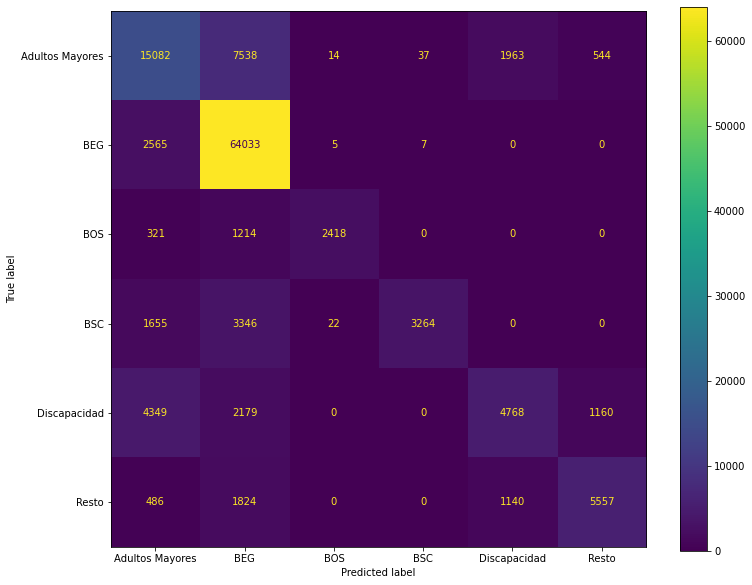

In [35]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_confusion_matrix(best_model_tree_2, x_train_2, y_train_2, ax=ax) 

### Evaluación sobre el conjunto de prueba

In [36]:
print(classification_report(y_test_2, test_predictions_tree_2))

                 precision    recall  f1-score   support

Adultos Mayores       0.61      0.59      0.60      6295
            BEG       0.79      0.96      0.87     16653
            BOS       0.97      0.59      0.73       988
            BSC       0.98      0.39      0.56      2071
   Discapacidad       0.60      0.37      0.46      3114
          Resto       0.75      0.62      0.68      2252

       accuracy                           0.75     31373
      macro avg       0.79      0.59      0.65     31373
   weighted avg       0.75      0.75      0.74     31373



### Matriz de confusión sobre el conjunto de prueba

In [37]:
cm=confusion_matrix(y_test_2, test_predictions_tree_2)
cm

array([[ 3700,  1942,     3,    13,   474,   163],
       [  675, 15975,     1,     1,     0,     1],
       [   80,   328,   580,     0,     0,     0],
       [  428,   827,    14,   802,     0,     0],
       [ 1071,   586,     0,     0,  1167,   290],
       [  116,   462,     0,     0,   288,  1386]])

/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


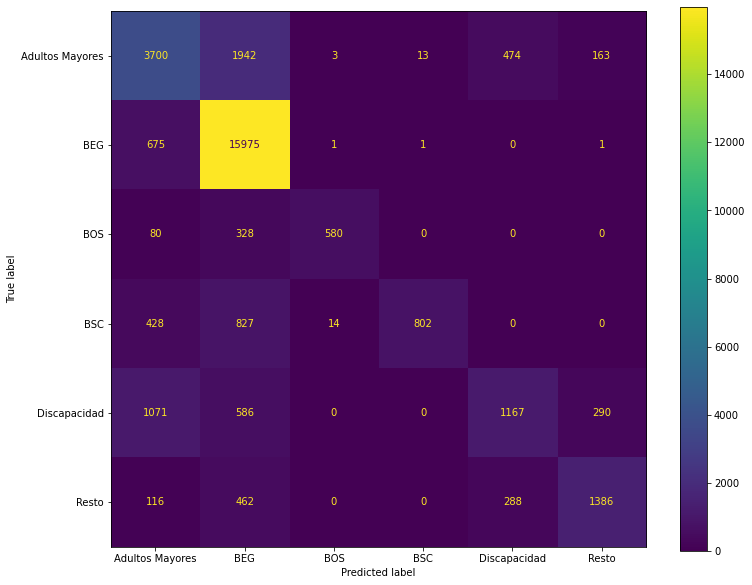

In [38]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_confusion_matrix(best_model_tree_2, x_test_2, y_test_2, ax=ax) 

## Random Forest Classifier

In [39]:
RandomForestClassifier(random_state=0).get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [44]:
param_grid_rf_2 = {
    'criterion': ['gini', 'entropy'],   
    'max_depth': [2,4,6,8],   
    'min_samples_leaf': [1,2,3,4],
    'ccp_alpha': [0.001],
}

print(f'Combinaciones posibles: {len(ParameterGrid(param_grid_rf_2))}')

Combinaciones posibles: 32


In [45]:
model_rf_2 =ensemble.RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(model_rf_2, param_grid_rf_2, scoring='accuracy', cv=5)
grid_cv.fit(x_train_2, y_train_2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.001], 'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 4]},
             scoring='accuracy')

In [46]:
# Elegimos el mejor modelo
best_model_rf_2 = grid_cv.best_estimator_
best_model_rf_2

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       min_samples_leaf=3, random_state=0)

In [47]:
train_predictions_rf_2 = best_model_rf_2.predict(x_train_2)
accuracy_train_rf_2 = accuracy_score(y_train_2, train_predictions_rf_2)
print(f"Accuracy train: %.2f%%" % (accuracy_train_rf_2 * 100.0))

Accuracy train: 70.37%


In [48]:
test_predictions_rf_2 = best_model_rf_2.predict(x_test_2)
accuracy_test_rf_2 = accuracy_score(y_test_2, test_predictions_rf_2)
print("Accuracy test: %.2f%%" % (accuracy_test_rf_2 * 100.0))

Accuracy test: 70.15%


### Evaluación sobre el conjunto de entrenamiento

In [49]:
print(classification_report(y_train_2, train_predictions_rf_2))

                 precision    recall  f1-score   support

Adultos Mayores       0.57      0.59      0.58     25178
            BEG       0.73      0.96      0.83     66610
            BOS       1.00      0.08      0.16      3953
            BSC       1.00      0.18      0.30      8287
   Discapacidad       0.69      0.31      0.43     12456
          Resto       0.81      0.45      0.58      9007

       accuracy                           0.70    125491
      macro avg       0.80      0.43      0.48    125491
   weighted avg       0.73      0.70      0.67    125491



### Matriz de confusión sobre el conjunto de entrenamiento

In [50]:
cm=confusion_matrix(y_train_2, train_predictions_rf_2)
cm

array([[14969,  8833,     0,     0,  1098,   278],
       [ 2992, 63618,     0,     0,     0,     0],
       [  448,  3170,   335,     0,     0,     0],
       [ 2230,  4597,     0,  1460,     0,     0],
       [ 4673,  3224,     0,     0,  3873,   686],
       [ 1071,  3241,     0,     0,   639,  4056]])

/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


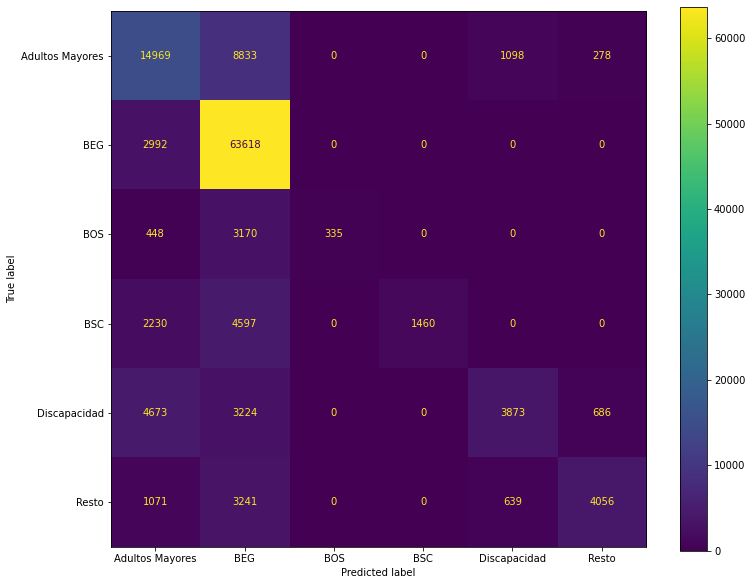

In [51]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_confusion_matrix(best_model_rf_2, x_train_2, y_train_2, ax=ax) 

### Evaluación sobre el conjunto de prueba

In [52]:
print(classification_report(y_test_2, test_predictions_rf_2))

                 precision    recall  f1-score   support

Adultos Mayores       0.57      0.60      0.58      6295
            BEG       0.73      0.95      0.83     16653
            BOS       1.00      0.08      0.15       988
            BSC       1.00      0.18      0.30      2071
   Discapacidad       0.69      0.29      0.41      3114
          Resto       0.78      0.45      0.57      2252

       accuracy                           0.70     31373
      macro avg       0.80      0.42      0.47     31373
   weighted avg       0.72      0.70      0.66     31373



### Matriz de confusión sobre el conjunto de prueba

In [53]:
cm=confusion_matrix(y_test_2, test_predictions_rf_2)
cm

array([[ 3756,  2189,     0,     0,   259,    91],
       [  767, 15886,     0,     0,     0,     0],
       [  117,   792,    79,     0,     0,     0],
       [  542,  1160,     0,   369,     0,     0],
       [ 1163,   852,     0,     0,   912,   187],
       [  278,   811,     0,     0,   156,  1007]])

/home/ivillagra/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


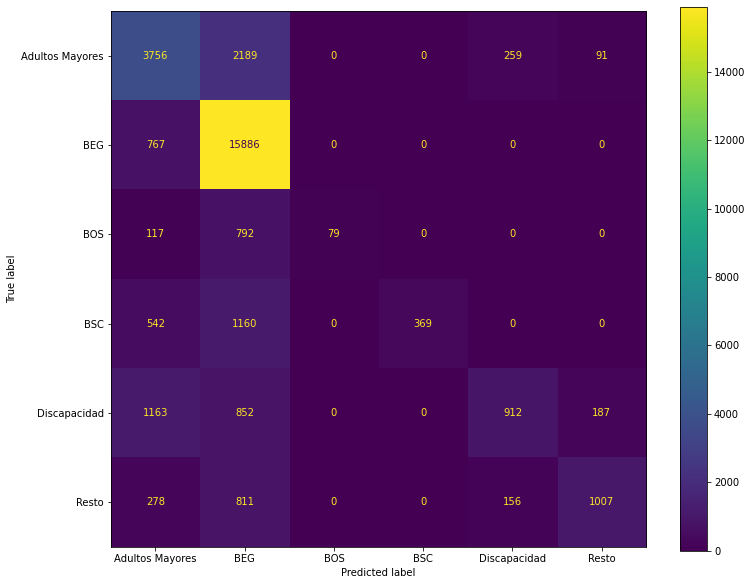

In [54]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_confusion_matrix(best_model_rf_2, x_test_2, y_test_2, ax=ax) 

## Conclusiones

Los dos algoritmos de aprendizaje supervisado escogidos permitieron obtener  muy buenas métricas. Los mejores resultados se obtuvieron utilizando Decision Tree Classifier, con un accuracy cercano al 88% y métricas elevadas de performance para la mayoría de los 7 tipo distintos de contrato. En el caso del Random Forest, si bien el accuracy score fue elevado y superior al 84%, solo se obtuvieron métricas elevadas de precision, recall y f1 score de los contratos Usuario Común y BEG, los dos contratos de mayor frecuencia. 

Se volvieron a correr los modelos eliminando del dataset a los Usuarios Comunes y, en ambos casos, disminuyó el accuracy score. No obstante, siguen siendo aceptables (por encima del 70%) y, en el caso del algoritmo Random Forest, se incrementaron las métricas de performance para la mayoría de los contratos.  